## Exploratory Data Analysis (EDA)

In this notebook, I will see if the data can be used to automatically determine if the Falcon 9’s first stage will land. Some attributes can be used to determine if the first stage can be reused. We can then use these features with machine learning to automatically predict if the first stage can land successfully.

I can observe that the success rate since 2013 has improved. We can incorporate this as a feature via launch Number. 
We see that different launch sites have different success rates. 
As a result, they can be used to help determine if the first stage will land successfully. 
CCAFS LC-40 has a success rate of 60%, while KSC LC-39A and VAFB SLC 4E have a success 
rate of around 77%. 
Combining attributes also gives us more information. 
If we overlay the result of the landing outcomes as a color 
we see that CCAFS LC-40, has a success rate of 60%, but if the mass is above 10,000 kg 
the success rate is 100%. 
Therefore, we will combine multiple features. 
In the lab, you will determine what attributes are correlated with successful landings. 
The categorical variables will be converted using one hot encoding, preparing the data 
for a machine learning model that will predict if the first stage will successfully land.


### Objective

- Exploratory Data Analysis
- Preparing Data Feature Engineering

### Import Libraries and load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_with_json_2.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### Exploratory Data Analysis (EDA)

First, let's try to see how the `FlightNumber` (indicating the continuous launch attemtps) and `Payload` variables would affect the launch outcome.

We can plot out the `FlightNumber` vs. `PayloadMass` and overlay the outcome of the launch. We see the as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important, it seems the more massive the payload, the less likely the first stage will return.

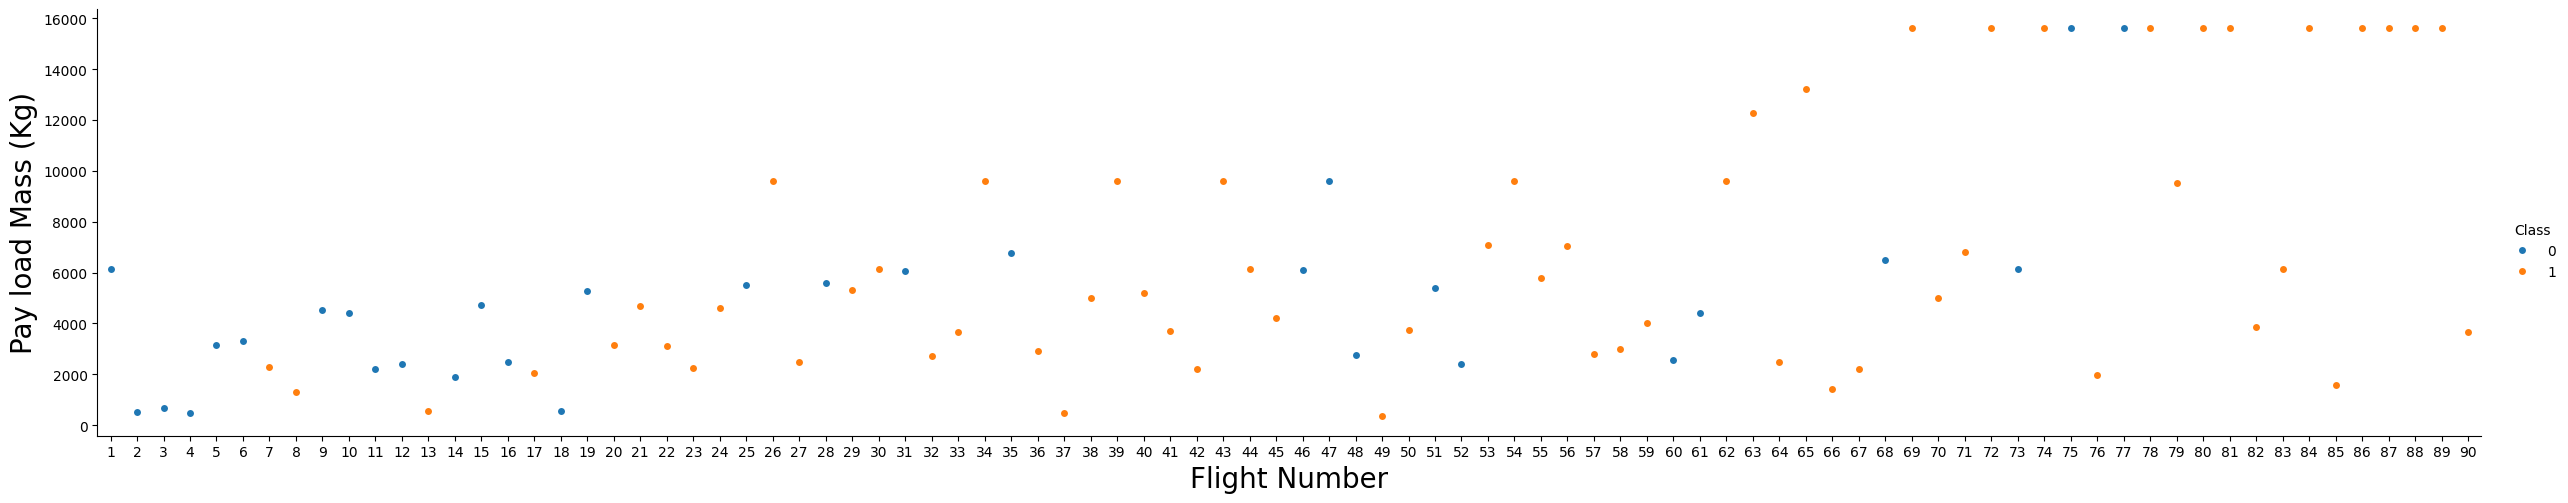

In [3]:
sns.catplot(y='PayloadMass', x='FlightNumber', hue='Class', data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel('Pay load Mass (Kg)', fontsize=20)
plt.show()

We see that different launch site have different success rates. `CCAFS LC-40`, has a success rate of 60%, while `KSC LC-39A` and `VAFB SLC 4E` has a success rate of 77%.

Now plot the `FlightNumber` vs. `LaunchSite`, and set the parameter `hue` to `class`.

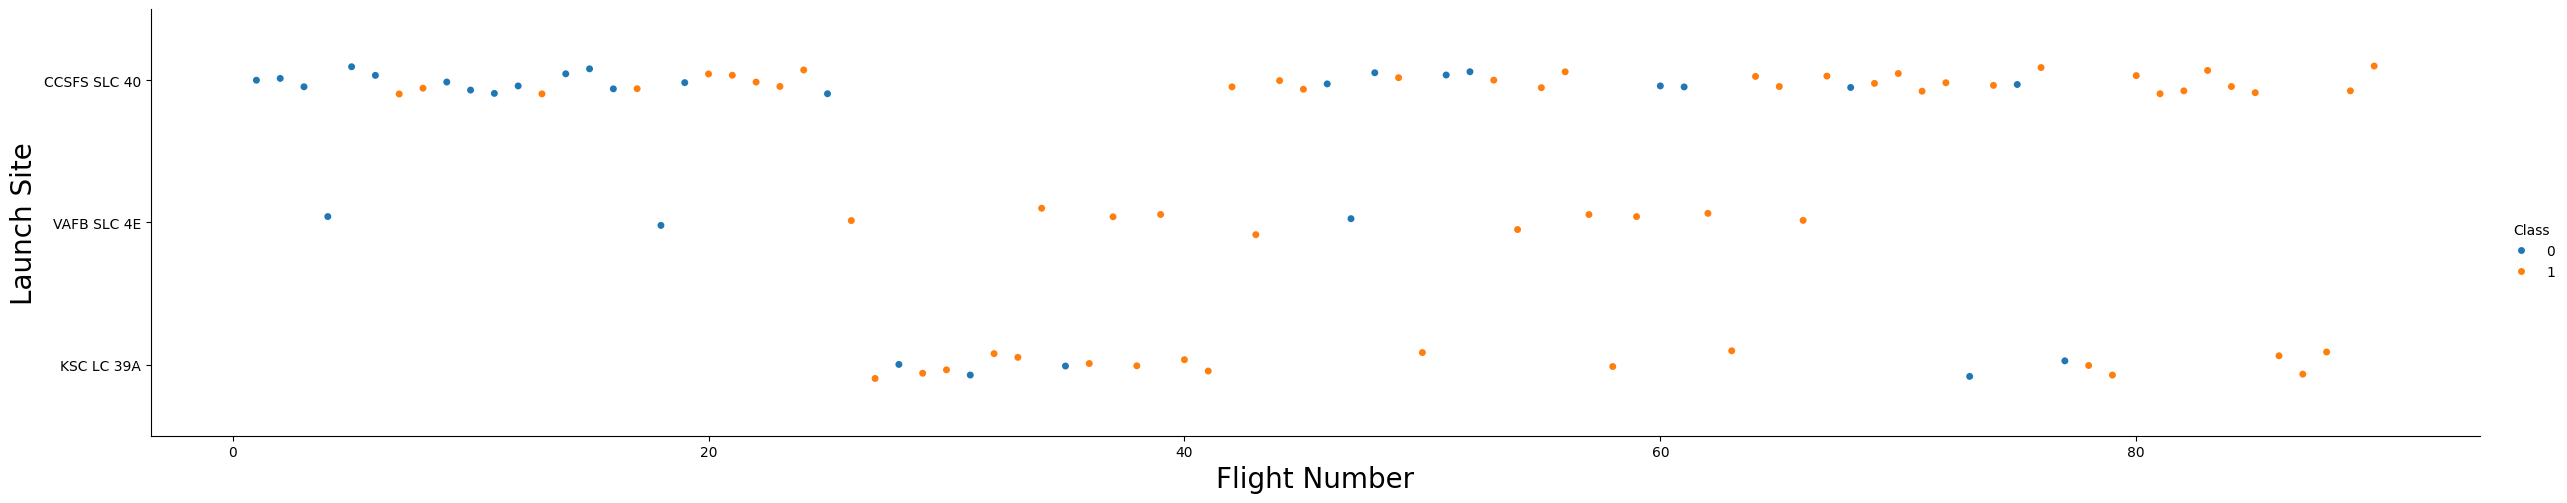

In [4]:
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

I also want the relationship between launch sites and their payload mass.

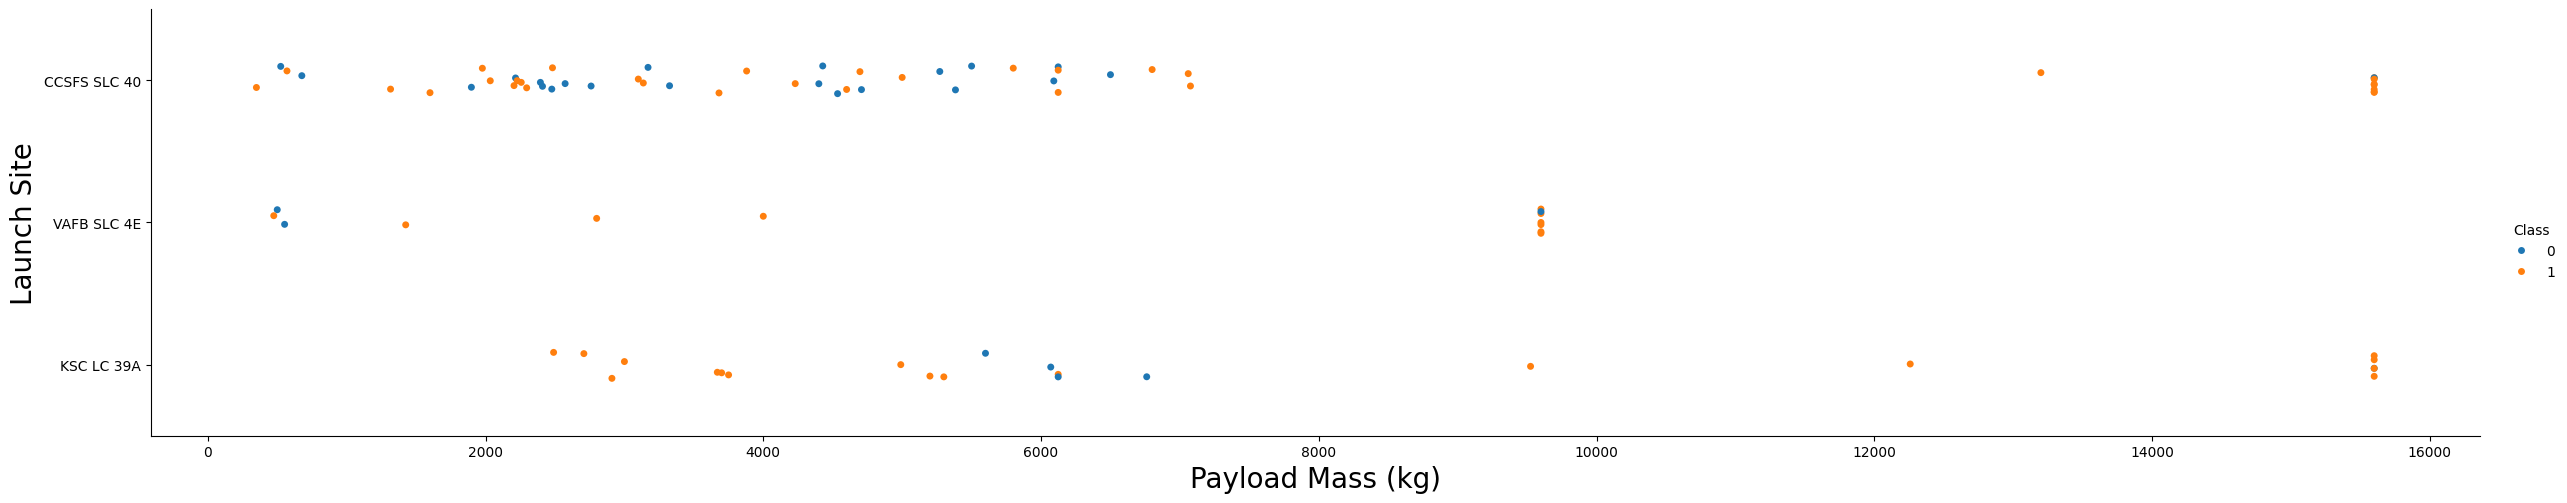

In [5]:
sns.catplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, aspect=5)
plt.xlabel('Payload Mass (kg)', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

I observe in Payload Vs. Launch Site scatter point chart that the VAFB-SLC launchsite has no rockets launched for heavypayload mass (greater then 10000). 

Now check the relationship between success rate and orbit type.

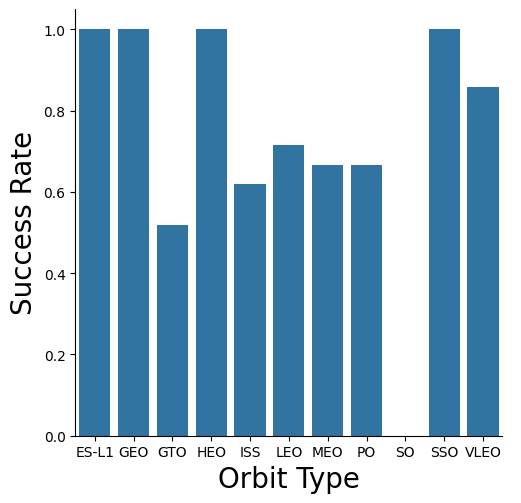

In [6]:
sns.catplot(x='Orbit', y='Class', data=df.groupby('Orbit')['Class'].mean().reset_index(), kind='bar')
plt.xlabel('Orbit Type', fontsize=20)
plt.ylabel('Success Rate', fontsize=20)
plt.show()

For each orbit, I want to see if there is any relationship between FlightNumber and Orbit type.

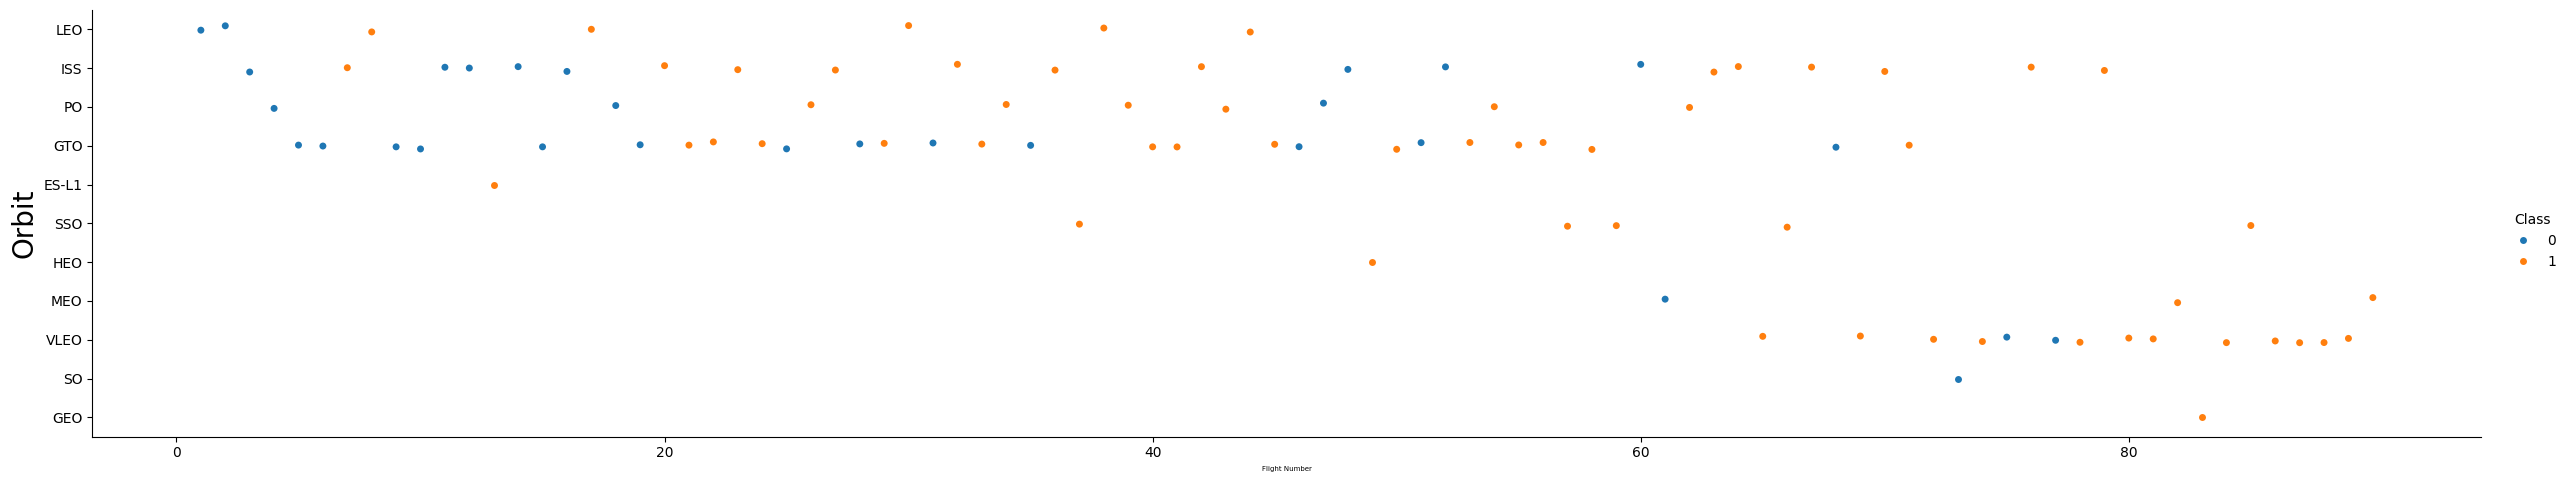

In [7]:
sns.catplot(x='FlightNumber', y='Orbit', hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=5)
plt.ylabel('Orbit', fontsize=20)
plt.show()

I see that in the LEO orbit the Success appears related to the number of flights, on the other hand, there seems to be no relationship between flight number when in GTO orbit.

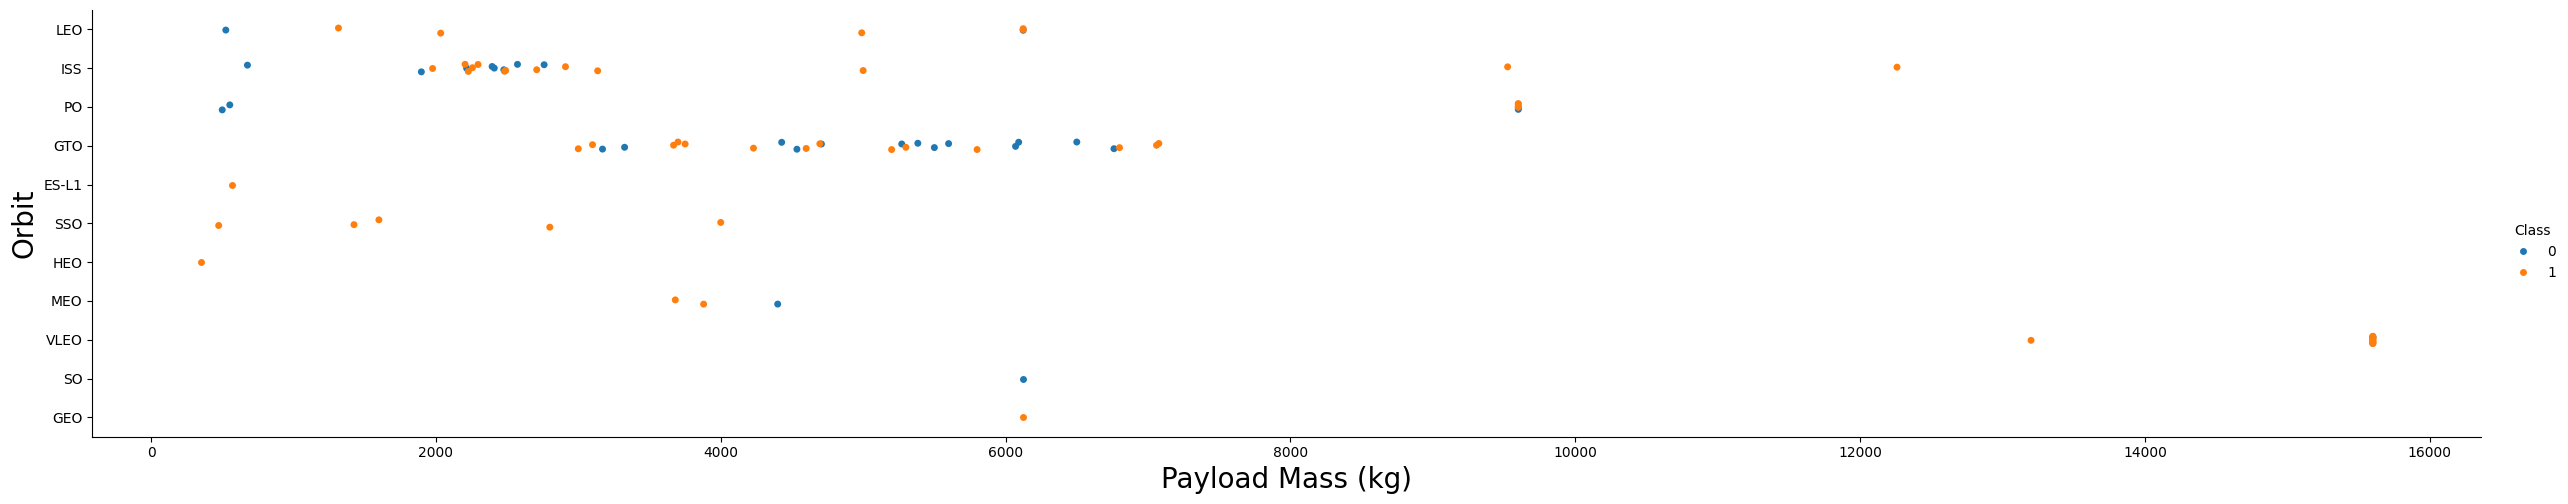

In [8]:
sns.catplot(x='PayloadMass', y='Orbit', hue='Class', data=df, aspect=5)
plt.xlabel('Payload Mass (kg)', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar, LEO, ISS.

However the GTO we cannot distinguish this well as both positive landing rate and negative landing (unsuccessful mission) are both here.

Now visualize the launch success yearly trend

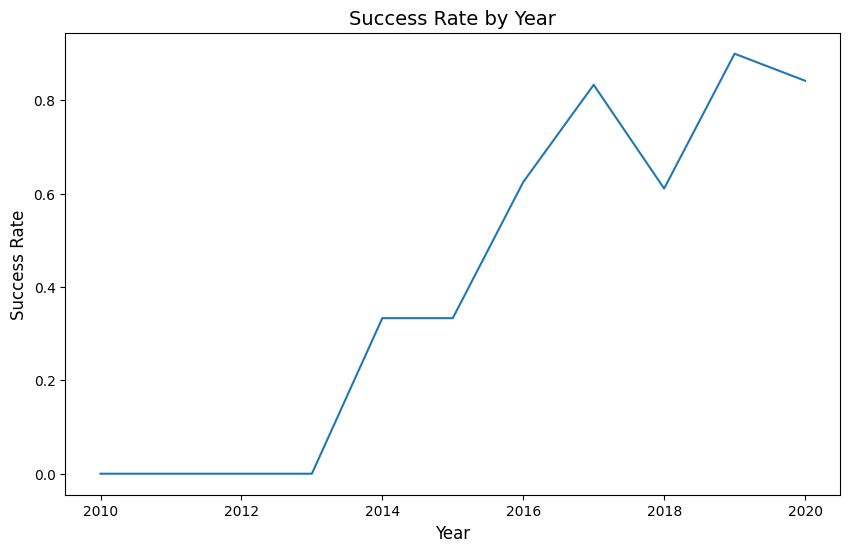

In [25]:
# A function to extract the year from a date string
def extract_year(date):
    return date.split("-")[0]

# Extracting the year from the 'Date' column and storing it in a new column 'Year'
df['Year'] = df['Date'].apply(extract_year)

# Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'])

# Group by year and calculate the mean of 'Class'
years_mean = df.groupby('Year')['Class'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=years_mean.index, y=years_mean)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.title('Success Rate by Year', fontsize=14)
plt.show()

we can observe that the success rate since 2013 kept increasing till 2020.

### Features Engineering

By now, I obtain some preliminary insights about how each important variable would affect the success rate, I will select the features that will be used in success prediction in the future module.

In [26]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class', 'Year', 'Data'],
      dtype='object')

In [27]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


We are now using `get_dummies` and `features` function of the dataframe to apply OneHotEncoder to the column `Orbit`, `LaunchSite`, `LandingPad`, and `Serial`. Then I am assigning the value to the variable `features_one_hot`, display the results using the method head. 

In [28]:
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


And convert into type float64

In [29]:
features_one_hot.astype('float64')

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
features_one_hot.to_csv('dataset_with_json_3.csv', index=False)